In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [73]:
df=pd.read_excel(r"C:\Users\prach\Downloads\nba_draft_combine_all_years.xlsx")

In [74]:
df

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,512,Peter Jok,2017,NaN,76.25,77.75,80.00,102.0,31.0,133.0,26.5,128.5,202.0,11.0,8.25,9.50,NaN,11.34,3.41
513,513,Rawle Alkins,2017,NaN,74.50,75.75,80.75,99.0,40.5,139.5,31.5,130.5,223.0,11.0,8.75,10.00,NaN,11.99,3.30
514,514,Sviatoslav Mykhailiuk,2017,NaN,78.50,79.50,77.00,100.0,33.0,133.0,27.0,127.0,220.0,11.4,8.00,9.25,NaN,12.40,3.53
515,515,Thomas Welsh,2017,NaN,83.50,84.50,84.00,109.5,NaN,NaN,NaN,NaN,254.0,10.9,9.00,10.50,NaN,NaN,NaN


DATA ANALYZING

In [75]:
df.head()

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,NaN,NaN,22.0,10.95,3.28
1,1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,NaN,NaN,9.0,11.15,3.18
2,2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,NaN,NaN,8.0,11.17,3.14
3,3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,NaN,NaN,18.0,11.12,3.27
4,4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,NaN,NaN,5.0,11.17,3.35


In [76]:
df.describe()

,Unnamed: 0,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
count,517.000000,517.000000,384.000000,517.000000,516.000000,517.000000,517.000000,450.000000,450.000000,450.000000,450.000000,516.000000,514.000000,470.000000,468.000000,284.000000,444.000000,446.000000
mean,258.000000,2013.187621,28.492188,77.609284,78.898740,82.497292,103.275629,35.136667,138.166667,29.584444,132.621111,214.833333,7.211673,8.725213,9.399573,10.239437,11.330248,3.299664
std,149.389312,2.531507,15.888973,3.287633,3.275837,3.943068,4.897515,3.561688,4.272686,3.052361,4.644194,24.683537,2.480823,0.474687,0.732439,4.938390,0.563144,0.128422
min,0.000000,2009.000000,1.000000,68.250000,69.500000,70.000000,88.500000,25.000000,125.500000,22.500000,119.000000,149.000000,3.200000,7.500000,7.000000,1.000000,10.070000,3.010000
25%,129.000000,2011.000000,15.000000,75.250000,76.750000,79.750000,100.000000,32.500000,135.500000,27.500000,129.500000,196.000000,5.400000,8.500000,9.000000,6.750000,10.940000,3.200000
50%,258.000000,2013.000000,28.000000,77.750000,79.000000,82.500000,103.500000,35.000000,138.500000,29.500000,133.000000,213.500000,6.600000,8.750000,9.500000,10.000000,11.255000,3.280000
75%,387.000000,2015.000000,41.000000,80.000000,81.250000,85.500000,107.000000,37.500000,141.500000,31.500000,136.000000,232.000000,8.400000,9.000000,9.750000,14.000000,11.660000,3.380000
max,516.000000,2017.000000,60.000000,85.250000,86.500000,92.500000,115.000000,44.500000,147.500000,38.000000,144.000000,303.000000,20.800000,10.250000,12.000000,23.000000,13.440000,3.810000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                517 non-null    int64  
 1   Player                    517 non-null    object 
 2   Year                      517 non-null    int64  
 3   Draft pick                384 non-null    float64
 4   Height (No Shoes)         517 non-null    float64
 5   Height (With Shoes)       516 non-null    float64
 6   Wingspan                  517 non-null    float64
 7   Standing reach            517 non-null    float64
 8   Vertical (Max)            450 non-null    float64
 9   Vertical (Max Reach)      450 non-null    float64
 10  Vertical (No Step)        450 non-null    float64
 11  Vertical (No Step Reach)  450 non-null    float64
 12  Weight                    516 non-null    float64
 13  Body Fat                  514 non-null    float64
 14  Hand (Leng

DATA CLEANING


In [78]:
# Checking for and removing duplicates
df.drop_duplicates(inplace=True)


In [79]:
df = df.dropna(subset=['Draft pick'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 0 to 493
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                384 non-null    int64  
 1   Player                    384 non-null    object 
 2   Year                      384 non-null    int64  
 3   Draft pick                384 non-null    float64
 4   Height (No Shoes)         384 non-null    float64
 5   Height (With Shoes)       384 non-null    float64
 6   Wingspan                  384 non-null    float64
 7   Standing reach            384 non-null    float64
 8   Vertical (Max)            332 non-null    float64
 9   Vertical (Max Reach)      332 non-null    float64
 10  Vertical (No Step)        332 non-null    float64
 11  Vertical (No Step Reach)  332 non-null    float64
 12  Weight                    383 non-null    float64
 13  Body Fat                  383 non-null    float64
 14  Hand (Length)  

In [101]:
df.loc[:, df.columns] = df.fillna(df.median(numeric_only=True))


In [82]:
df

,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.00,248.0,8.2,8.75,9.25,22.0,10.95,3.28
1,1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.00,213.0,5.1,8.75,9.25,9.0,11.15,3.18
2,2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.00,215.0,4.4,8.75,9.25,8.0,11.17,3.14
3,3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.50,234.0,8.5,8.75,9.25,18.0,11.12,3.27
4,4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.00,228.0,5.2,8.75,9.25,5.0,11.17,3.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,489,Monte Morris,2017,51.0,73.25,74.50,76.00,96.5,33.5,130.0,28.0,124.50,175.0,6.9,8.25,8.75,10.0,11.00,3.19
490,490,Edmond Sumner,2017,52.0,76.00,77.75,81.00,102.5,35.5,139.0,30.0,133.25,176.0,8.3,8.25,9.00,10.0,11.21,3.27
491,491,Kadeem Allen,2017,53.0,73.00,74.25,81.25,99.5,35.5,135.0,33.0,132.50,192.0,6.4,8.50,8.75,10.0,11.24,3.15
492,492,Alec Peters,2017,54.0,79.25,80.75,82.75,105.0,35.5,139.0,30.0,133.25,232.0,8.8,8.75,10.00,10.0,11.21,3.27


In [83]:
# Verifying the cleaned dataset
print("Cleaned DataFrame info:")
df.info()



Cleaned DataFrame info:
<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 0 to 493
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                384 non-null    int64  
 1   Player                    384 non-null    object 
 2   Year                      384 non-null    int64  
 3   Draft pick                384 non-null    float64
 4   Height (No Shoes)         384 non-null    float64
 5   Height (With Shoes)       384 non-null    float64
 6   Wingspan                  384 non-null    float64
 7   Standing reach            384 non-null    float64
 8   Vertical (Max)            384 non-null    float64
 9   Vertical (Max Reach)      384 non-null    float64
 10  Vertical (No Step)        384 non-null    float64
 11  Vertical (No Step Reach)  384 non-null    float64
 12  Weight                    384 non-null    float64
 13  Body Fat                  384 non-null    floa

In [84]:

# Displaying first few rows of the cleaned dataset
df.head()


,Unnamed: 0,Player,Year,Draft pick,Height (No Shoes),Height (With Shoes),Wingspan,Standing reach,Vertical (Max),Vertical (Max Reach),Vertical (No Step),Vertical (No Step Reach),Weight,Body Fat,Hand (Length),Hand (Width),Bench,Agility,Sprint
0,0,Blake Griffin,2009,1.0,80.50,82.00,83.25,105.0,35.5,140.5,32.0,137.0,248.0,8.2,8.75,9.25,22.0,10.95,3.28
1,1,Terrence Williams,2009,11.0,77.00,78.25,81.00,103.5,37.0,140.5,30.5,134.0,213.0,5.1,8.75,9.25,9.0,11.15,3.18
2,2,Gerald Henderson,2009,12.0,76.00,77.00,82.25,102.5,35.0,137.5,31.5,134.0,215.0,4.4,8.75,9.25,8.0,11.17,3.14
3,3,Tyler Hansbrough,2009,13.0,80.25,81.50,83.50,106.0,34.0,140.0,27.5,133.5,234.0,8.5,8.75,9.25,18.0,11.12,3.27
4,4,Earl Clark,2009,14.0,80.50,82.25,86.50,109.5,33.0,142.5,28.5,138.0,228.0,5.2,8.75,9.25,5.0,11.17,3.35


In [102]:
# Converting data types
numeric_columns = ['Height (No Shoes)', 'Height (With Shoes)', 'Wingspan', 'Standing reach',
                   'Vertical (Max)', 'Vertical (Max Reach)', 'Vertical (No Step)', 
                   'Vertical (No Step Reach)', 'Weight', 'Body Fat', 
                   'Hand (Length)', 'Hand (Width)', 'Bench', 'Agility', 'Sprint']


df.loc[:, numeric_columns] = df.loc[:, numeric_columns].apply(pd.to_numeric, errors='coerce')


In [86]:
df.columns

Index(['Unnamed: 0', 'Player', 'Year', 'Draft pick', 'Height (No Shoes)',
       'Height (With Shoes)', 'Wingspan', 'Standing reach', 'Vertical (Max)',
       'Vertical (Max Reach)', 'Vertical (No Step)',
       'Vertical (No Step Reach)', 'Weight', 'Body Fat', 'Hand (Length)',
       'Hand (Width)', 'Bench', 'Agility', 'Sprint'],
      dtype='object')

DATA VISUALIZATION

In [87]:
# Grouping by Year and calculating the mean for each attribute
yearly_data = df.groupby('Year')[numeric_columns].mean()


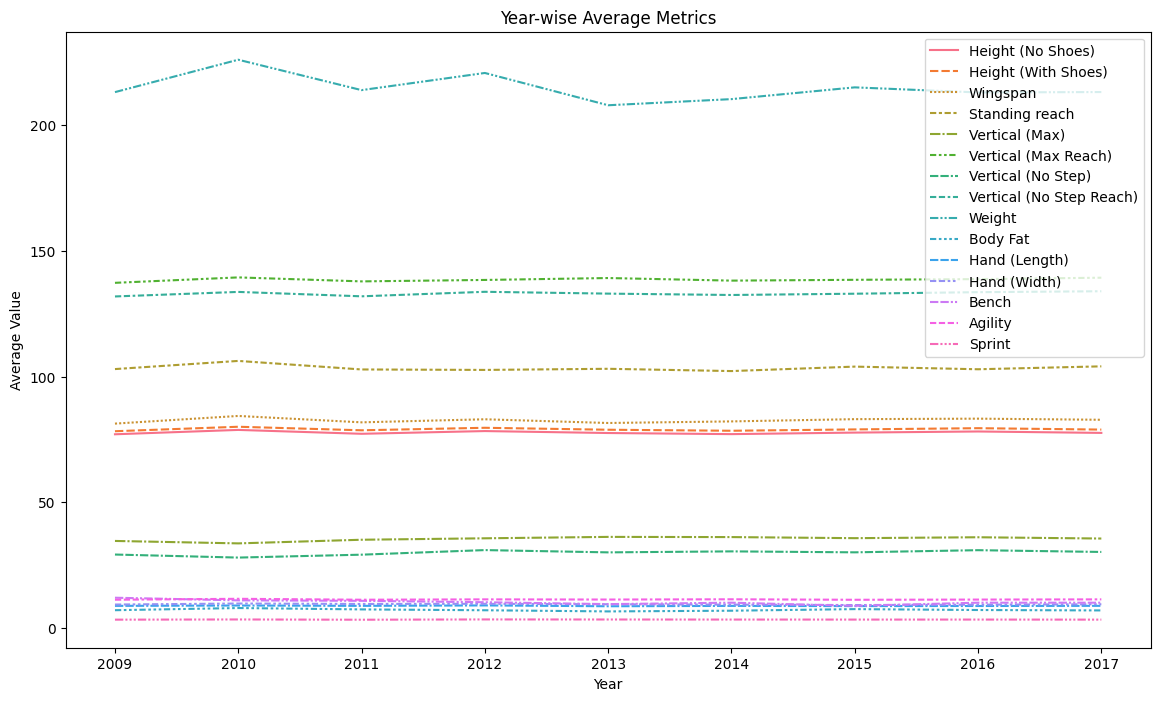

In [88]:
# Plotting Year-wise trends for key metrics
plt.figure(figsize=(14, 8))
sns.lineplot(data=yearly_data)
plt.title('Year-wise Average Metrics')
plt.xlabel('Year')
plt.ylabel('Average Value')
plt.legend(loc='upper right')
plt.show()

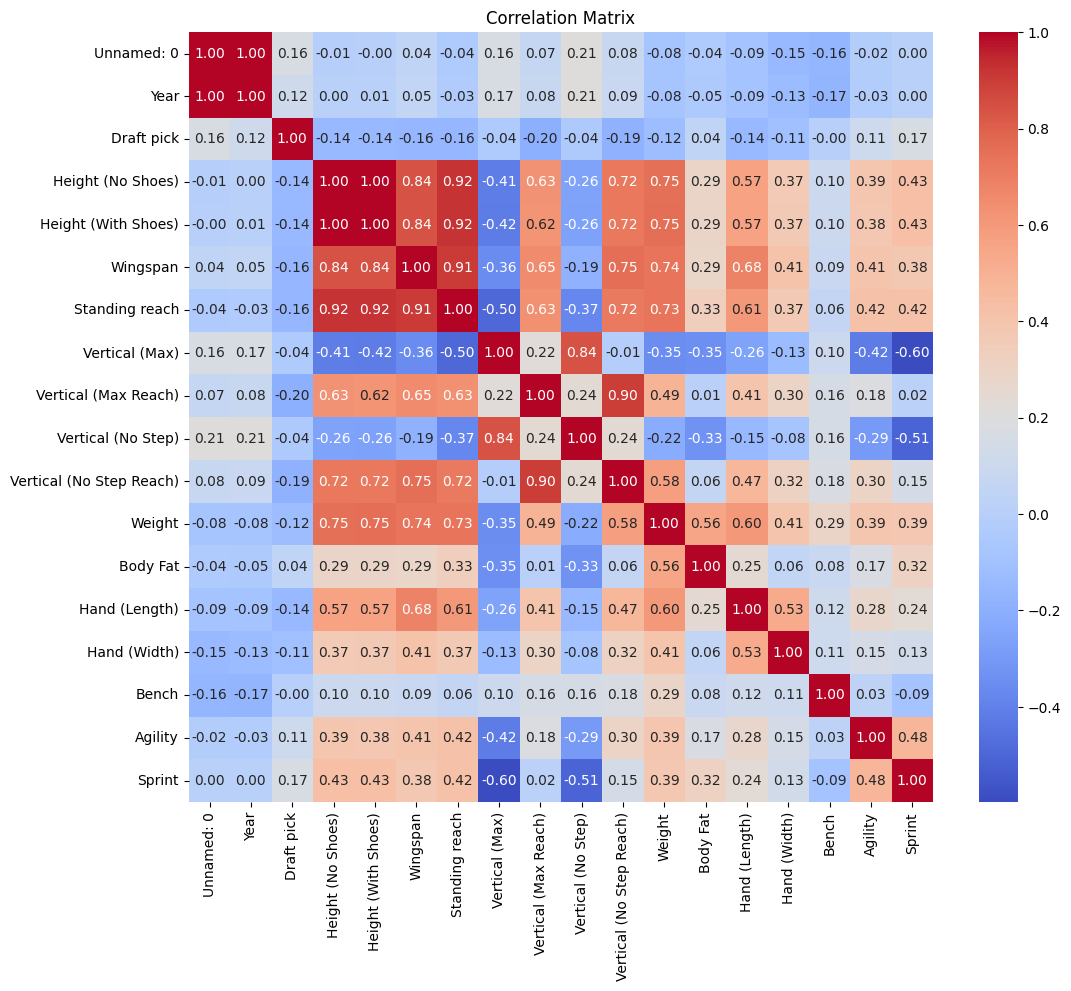

In [89]:

# Selecting only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# correlation matrix
corr = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

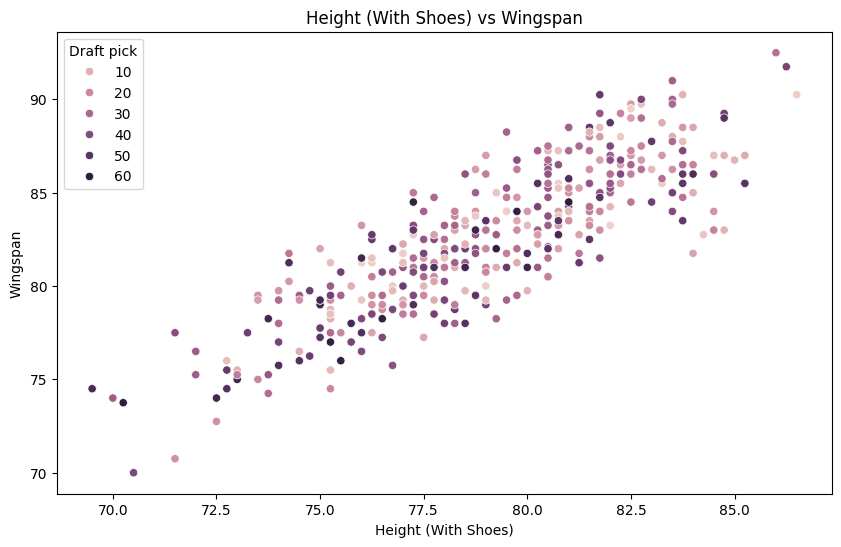

In [90]:
# Scatter Plot for Height vs Wingspan
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height (With Shoes)', y='Wingspan', hue='Draft pick', data=df)
plt.title('Height (With Shoes) vs Wingspan')
plt.xlabel('Height (With Shoes)')
plt.ylabel('Wingspan')
plt.show()

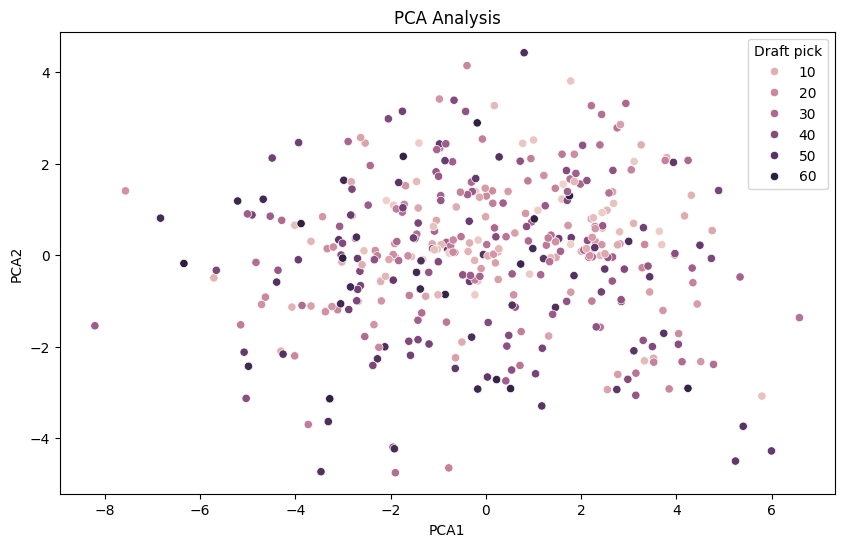

In [103]:
# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numeric_columns].dropna())

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Assigning PCA results to the DataFrame using .loc
df.loc[:, 'PCA1'] = pca_result[:, 0]
df.loc[:, 'PCA2'] = pca_result[:, 1]

# Scatter Plot for PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Draft pick', data=df)
plt.title('PCA Analysis')
plt.show()


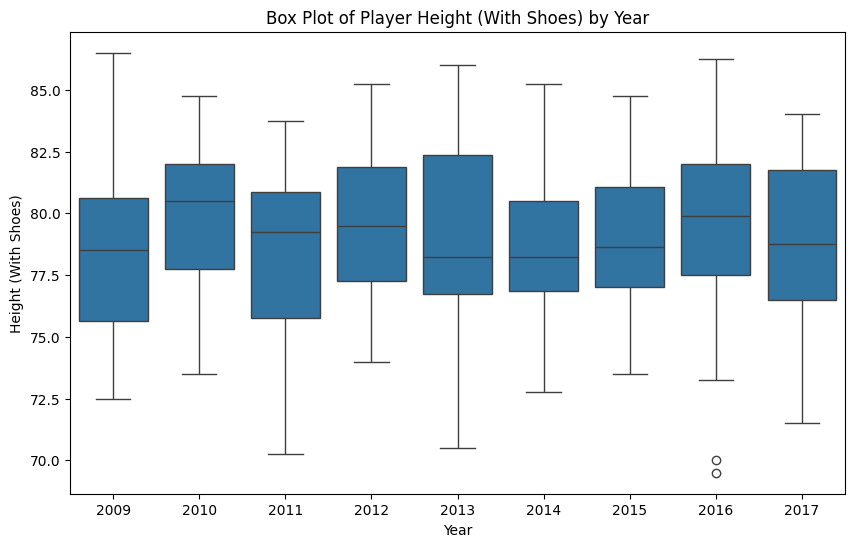

In [92]:
#Box Plot of player height (with shoes) by year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='Height (With Shoes)', data=df)
plt.title('Box Plot of Player Height (With Shoes) by Year')
plt.xlabel('Year')
plt.ylabel('Height (With Shoes)')
plt.show()

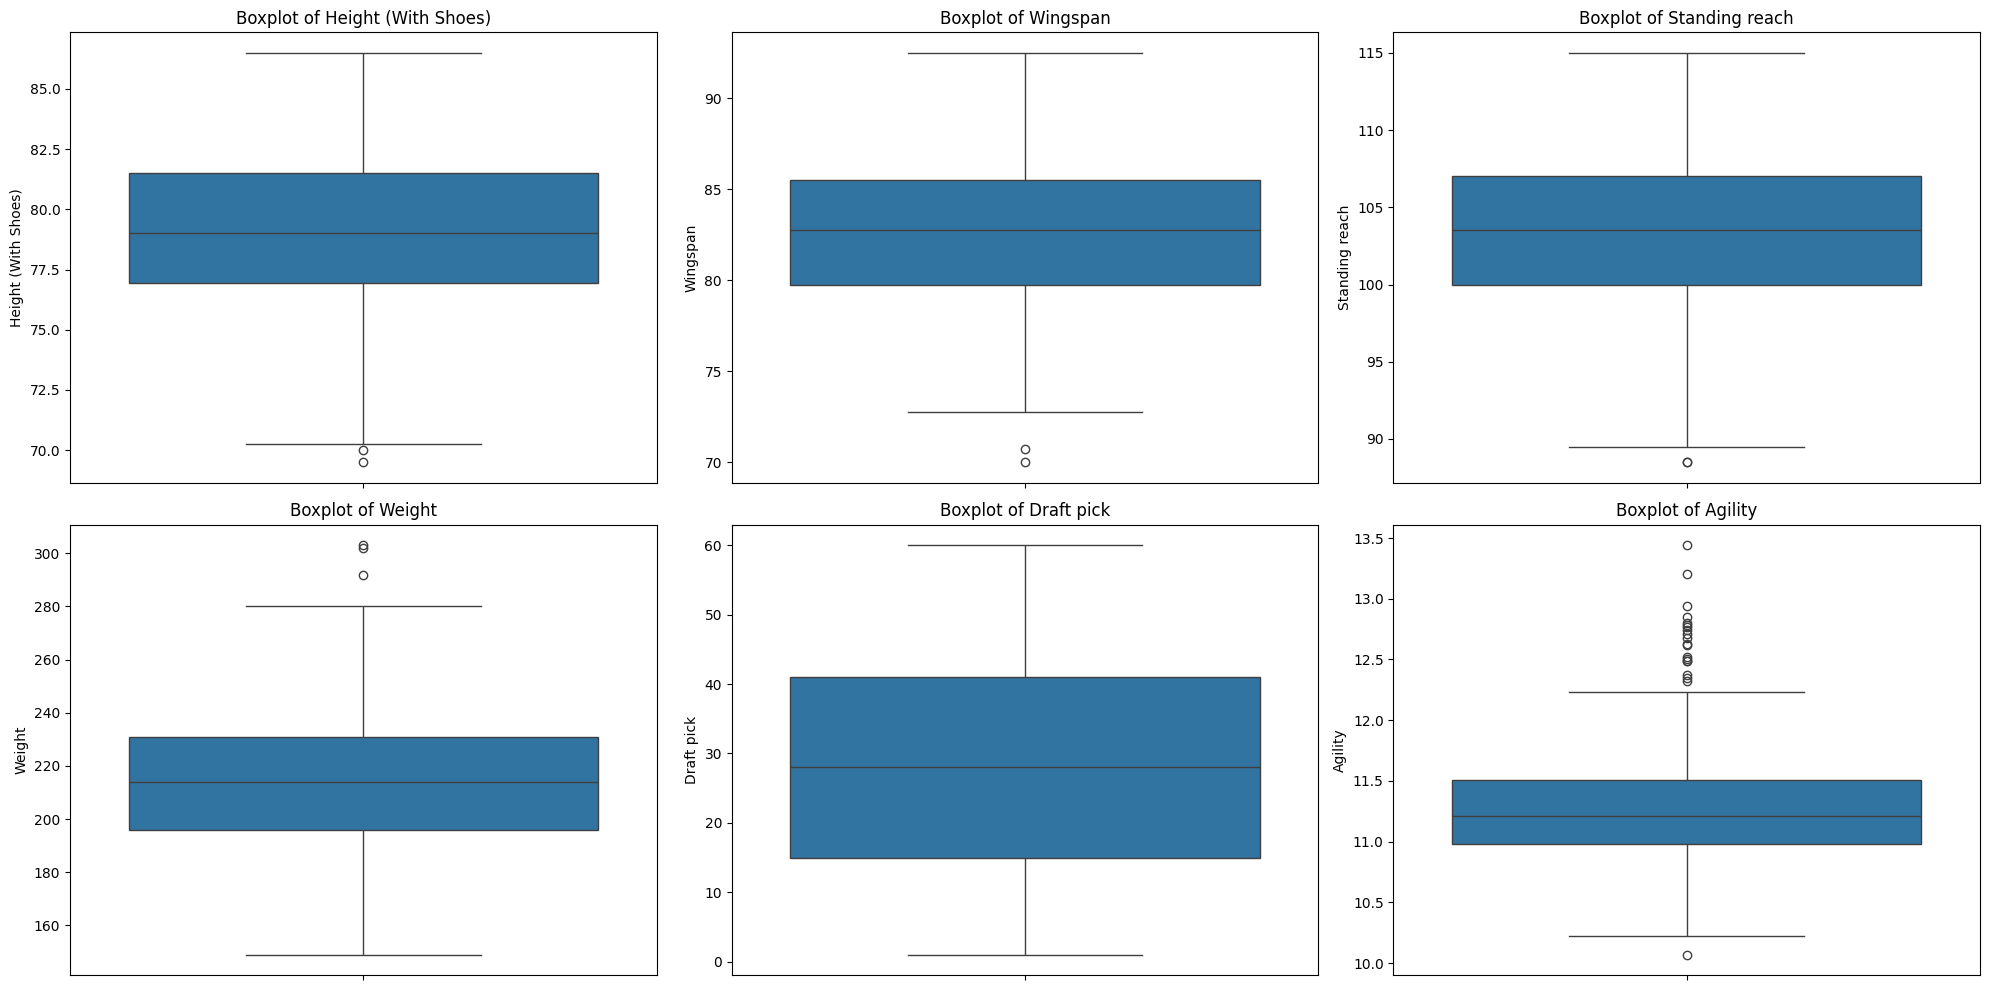

In [93]:
# Boxplot of key attributes
col=['Height (With Shoes)', 'Wingspan', 'Standing reach', 'Weight', 'Draft pick', 'Agility']
plt.figure(figsize=(20,10))
for i, feature in enumerate(col):
 plt.subplot(2,3,i+1)
 sns.boxplot(y=df[feature])
 plt.title(f"Boxplot of {feature}")
 plt.tight_layout()
plt.show()

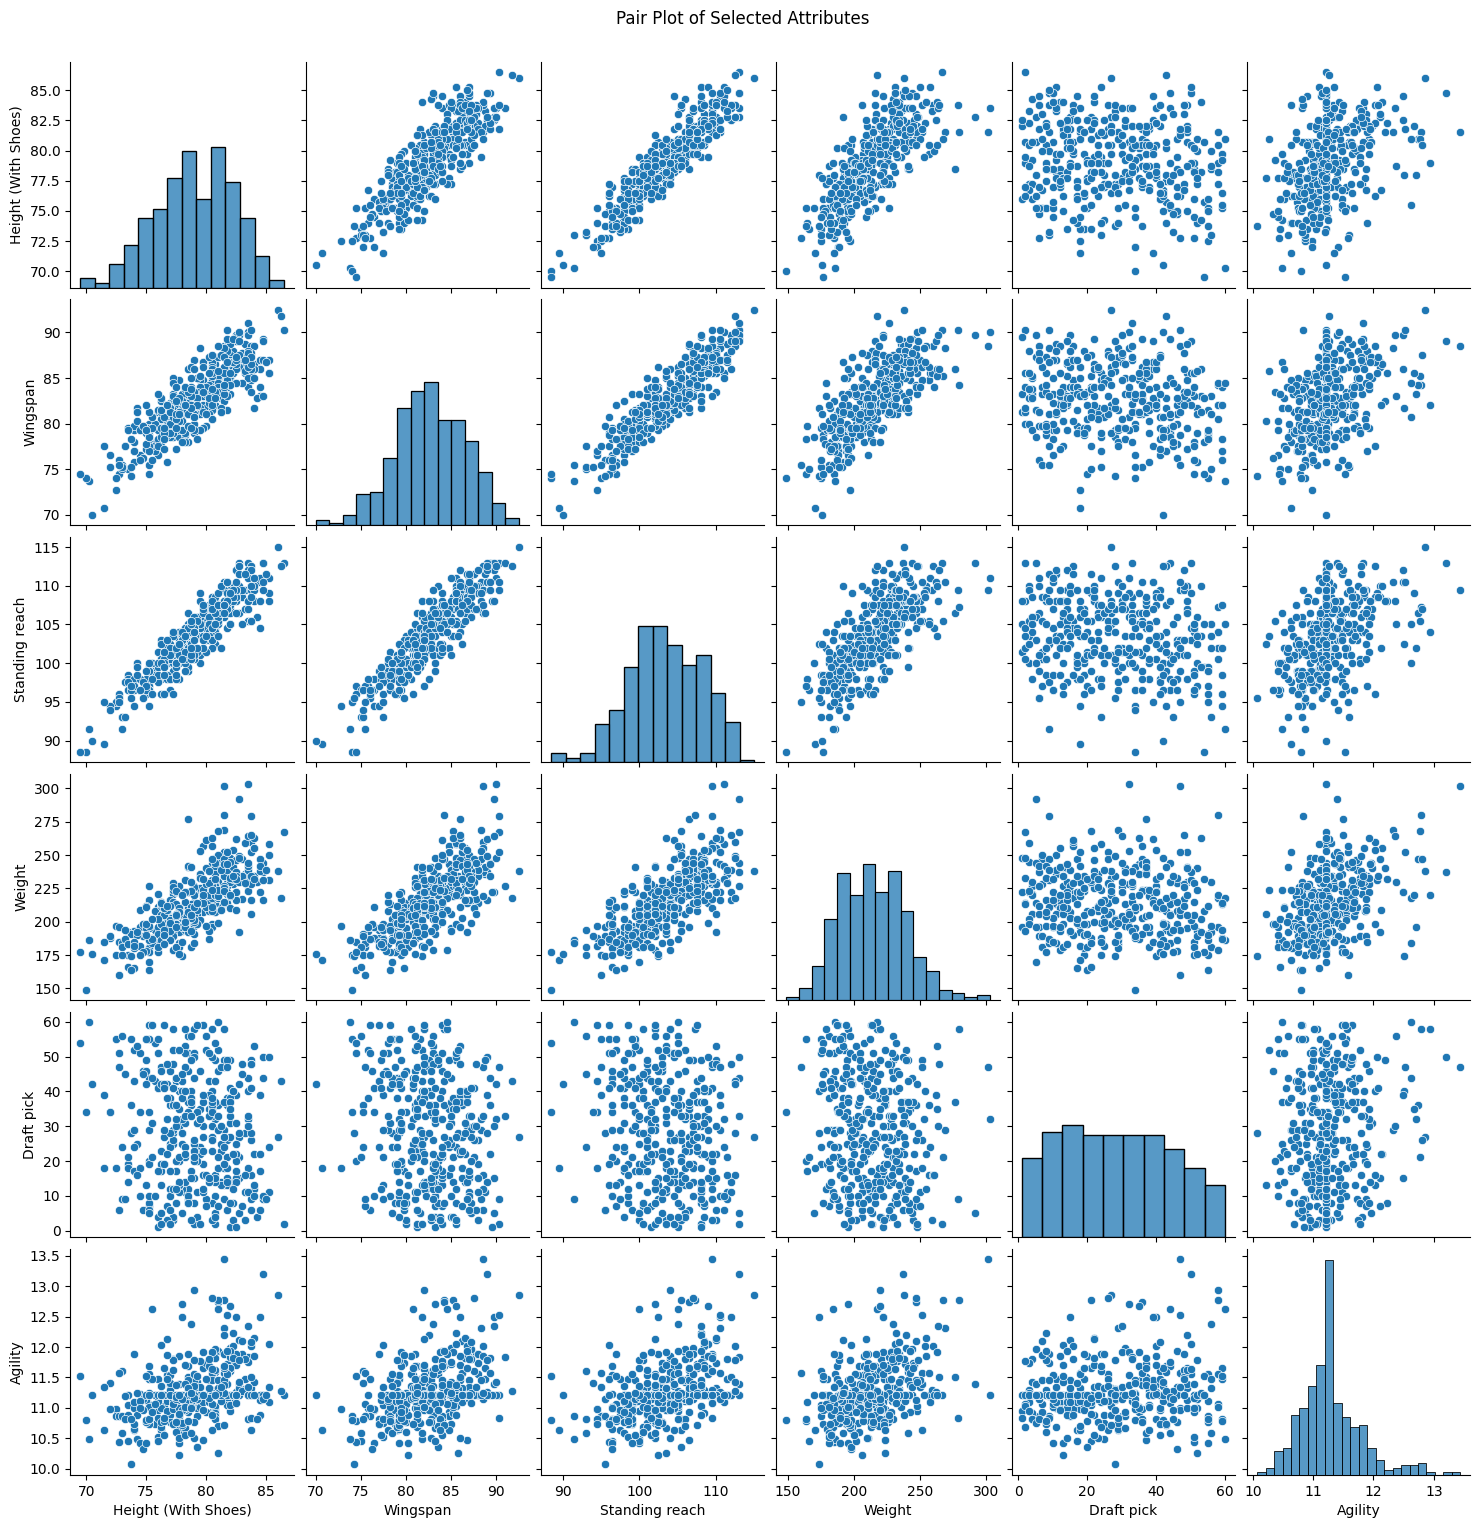

In [94]:
# Pair plot for a subset of attributes
sns.pairplot(df[['Height (With Shoes)', 'Wingspan', 'Standing reach', 'Weight', 'Draft pick', 'Agility']])
plt.suptitle('Pair Plot of Selected Attributes', y=1.02)
plt.show()

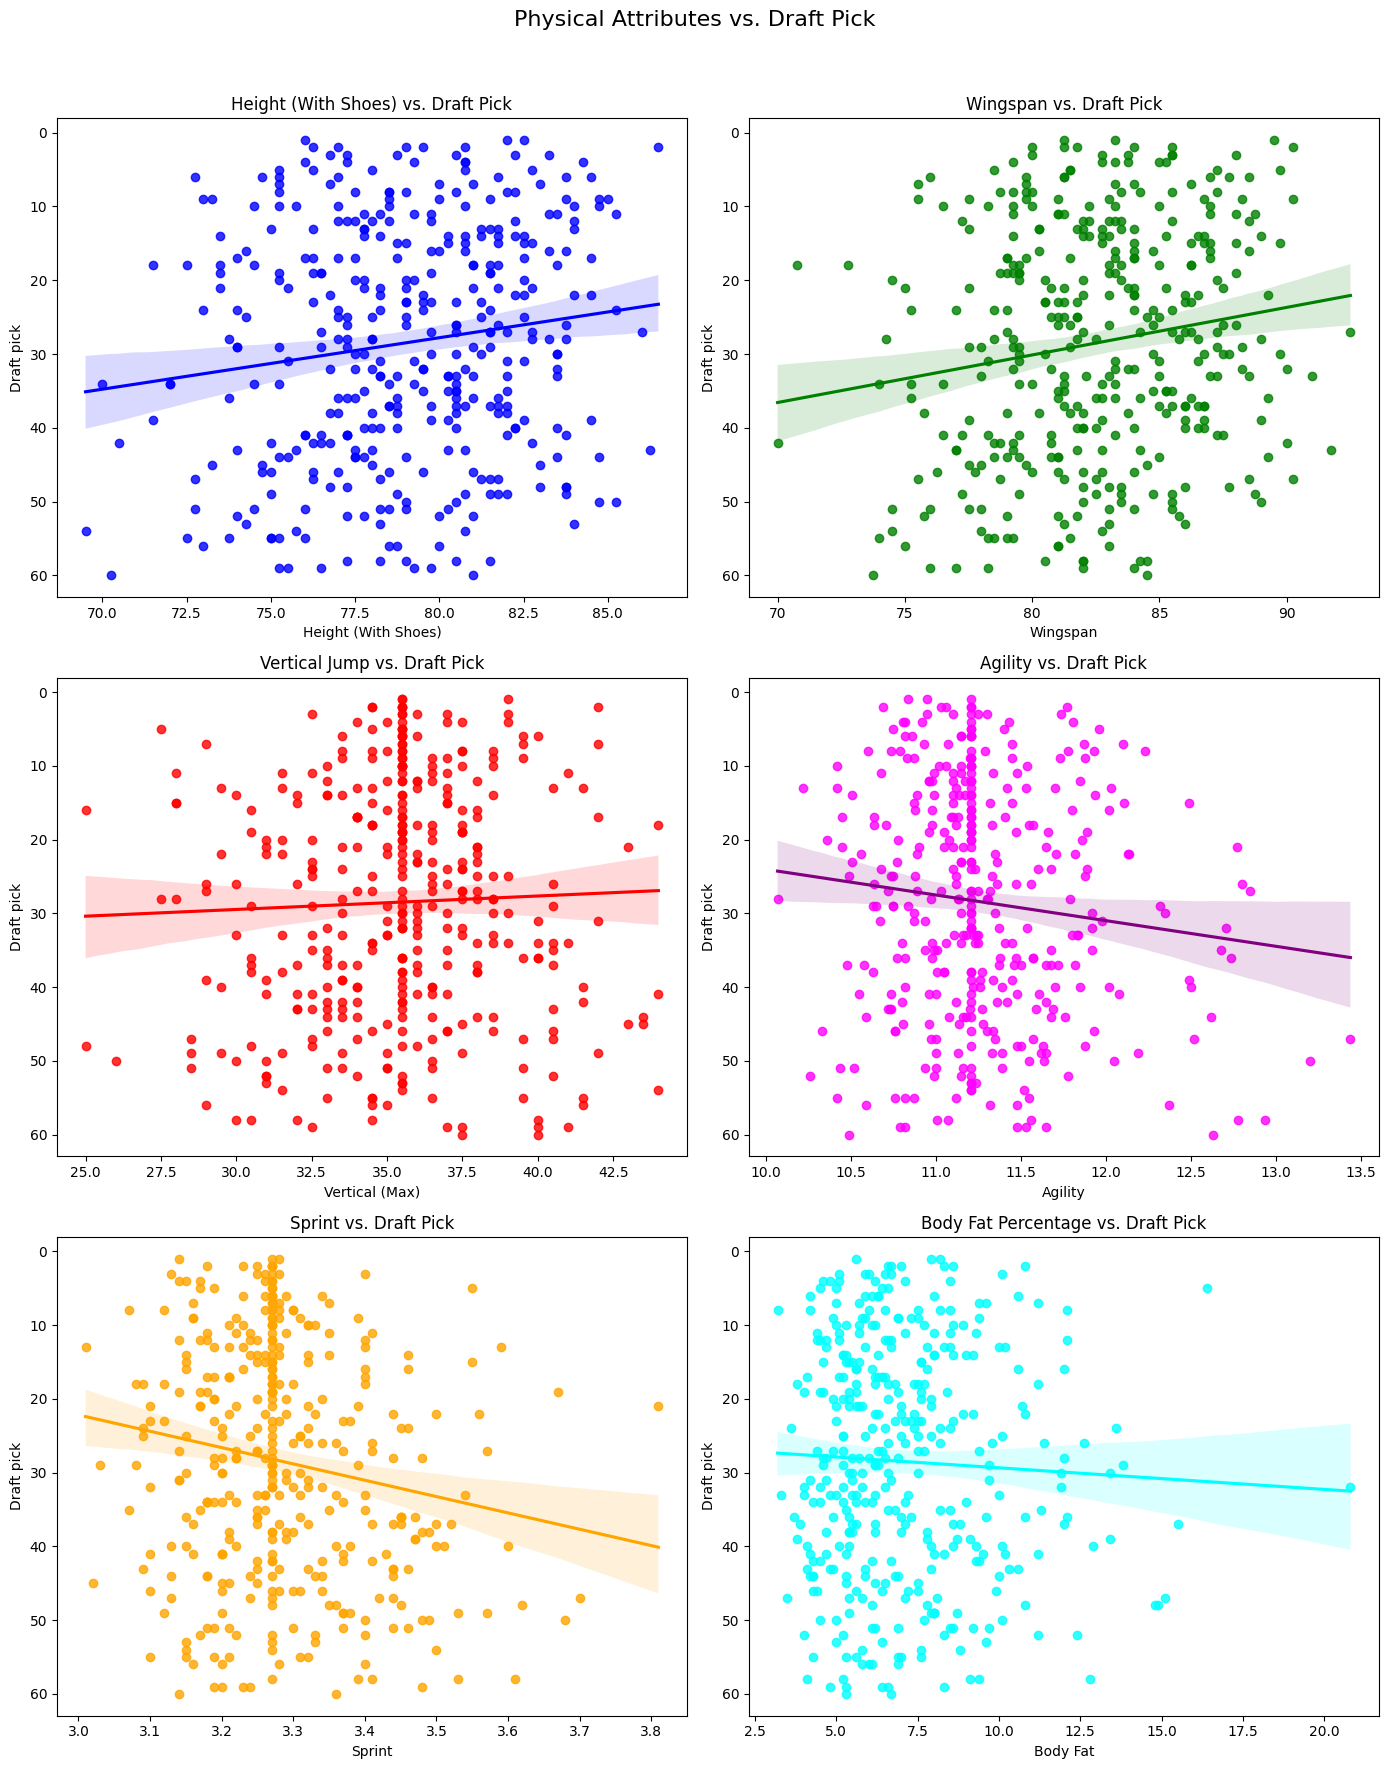

In [95]:
# Converting relevant columns to numeric, coercing errors to NaN
columns_to_convert = ['Height (With Shoes)', 'Wingspan', 'Vertical (Max)', 'Weight', 'Draft pick', 'Agility', 'Sprint', 'Body Fat']
df.loc[:, columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df_clean = df.dropna(subset=columns_to_convert)



# Analyzing relation between Physical Attributes vs Draft Pick using Regression Plot 

fig, axes = plt.subplots(3, 2, figsize=(14, 18))
fig.suptitle('Physical Attributes vs. Draft Pick', fontsize=16)

# Height vs. Draft Pick
sns.regplot(x='Height (With Shoes)', y='Draft pick', data=df_clean, ax=axes[0, 0], scatter_kws={'color': 'blue'}, line_kws={'color': 'blue'})
axes[0, 0].set_title('Height (With Shoes) vs. Draft Pick')
axes[0, 0].invert_yaxis()  # Lower draft picks (higher number) are better

# Wingspan vs. Draft Pick 
sns.regplot(x='Wingspan', y='Draft pick', data=df_clean, ax=axes[0, 1], scatter_kws={'color': 'green'}, line_kws={'color': 'green'})
axes[0, 1].set_title('Wingspan vs. Draft Pick')
axes[0, 1].invert_yaxis()

# Vertical Jump vs. Draft Pick 
sns.regplot(x='Vertical (Max)', y='Draft pick', data=df_clean, ax=axes[1, 0], scatter_kws={'color': 'red'}, line_kws={'color': 'red'})
axes[1, 0].set_title('Vertical Jump vs. Draft Pick')
axes[1, 0].invert_yaxis()

# Agility vs. Draft Pick 
sns.regplot(x='Agility', y='Draft pick', data=df_clean, ax=axes[1, 1], scatter_kws={'color': 'magenta'}, line_kws={'color': 'purple'})
axes[1, 1].set_title('Agility vs. Draft Pick')
axes[1, 1].invert_yaxis()

# Sprint vs. Draft Pick
sns.regplot(x='Sprint', y='Draft pick', data=df_clean, ax=axes[2, 0], scatter_kws={'color': 'orange'}, line_kws={'color': 'orange'})
axes[2, 0].set_title('Sprint vs. Draft Pick')
axes[2, 0].invert_yaxis()

# Body Fat Percentage vs. Draft Pick 
sns.regplot(x='Body Fat', y='Draft pick', data=df_clean, ax=axes[2, 1], scatter_kws={'color': 'cyan'}, line_kws={'color': 'cyan'})
axes[2, 1].set_title('Body Fat Percentage vs. Draft Pick')
axes[2, 1].invert_yaxis()

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 384 entries, 0 to 493
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                384 non-null    int64  
 1   Player                    384 non-null    object 
 2   Year                      384 non-null    int64  
 3   Draft pick                384 non-null    float64
 4   Height (No Shoes)         384 non-null    float64
 5   Height (With Shoes)       384 non-null    float64
 6   Wingspan                  384 non-null    float64
 7   Standing reach            384 non-null    float64
 8   Vertical (Max)            384 non-null    float64
 9   Vertical (Max Reach)      384 non-null    float64
 10  Vertical (No Step)        384 non-null    float64
 11  Vertical (No Step Reach)  384 non-null    float64
 12  Weight                    384 non-null    float64
 13  Body Fat                  384 non-null    float64
 14  Hand (Length)  